In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, SimpleRNN, LSTM
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [46]:
data = pd.read_csv('goog.csv')

In [47]:
data.head()

,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400


In [48]:
data = data[['Open']].values

In [49]:
scaler = MinMaxScaler()

In [50]:
data_scale = scaler.fit_transform(data)

In [51]:
x= []
y=[]
time_steps = 60

In [52]:
for i in range(time_steps, len(data_scale)):
    x.append(data_scale[i-time_steps:i, 0])
    y.append(data_scale[i, 0])

In [53]:
x, y = np.array(x), np.array(y)

In [54]:
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

In [55]:
model = Sequential([
    Input(shape=( x.shape[1], 1)),
    SimpleRNN(units=50, activation='tanh', return_sequences=True),
    SimpleRNN(units=50),
    Dense(1)
])

In [69]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [70]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 60, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,701 (30.08 KB)

 Trainable params: 7,701 (30.08 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

In [72]:
history = model.fit(x, y , epochs=50, batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.0071 - mae: 0.0842
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.1579 - mae: 0.3974
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0134 - mae: 0.1156
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0280 - mae: 0.1673
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0747 - mae: 0.2733
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.0498 - mae: 0.2232


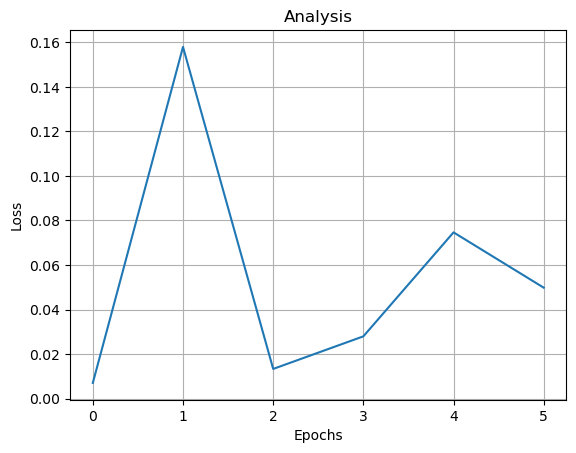

In [73]:
plt.plot(history.history['loss'], label='Loss')
plt.title("Analysis")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [74]:
test = pd.read_csv('goog.csv')
test = test[['Open']].values

In [75]:
tot_data = np.concatenate((data[-60:], test), axis=0)
tot_data_scale = scaler.transform(tot_data)

In [41]:
X_test = []
for i in range(60, len(tot_data)):
    X_test.append(tot_data[i-60:i, 0])
X_test = np.array(X_test).reshape(-1, 60, 1)

In [65]:
y_test = test[0:len(X_test)]

In [42]:
pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 967ms/step


In [76]:
y_test_scaled = scaler.transform(y_test)
loss, mae = model.evaluate(X_test, y_test_scaled)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.7119 - mae: 0.8060


In [77]:
pred_scale = scaler.inverse_transform(pred)

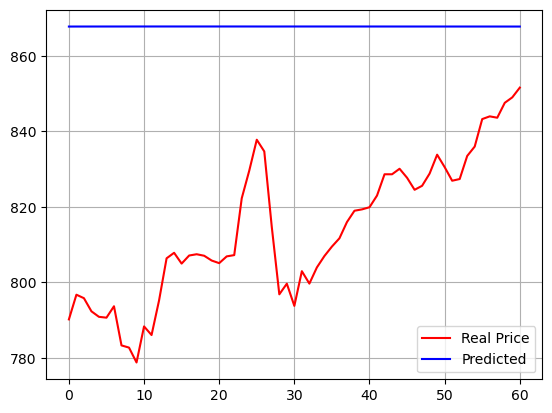

In [78]:
plt.plot(test, color='red', label='Real Price')
plt.plot(pred_scale, color='blue', label='Predicted')
plt.legend()
plt.grid(True)
plt.show()